In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [610]:
data = pd.read_csv('cardio_train.csv', ";")
data

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [611]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [612]:
# check for missing values
for i in data.columns:
    print(i, data[i].isna().sum())

id 0
age 0
gender 0
height 0
weight 0
ap_hi 0
ap_lo 0
cholesterol 0
gluc 0
smoke 0
alco 0
active 0
cardio 0


In [613]:
data = data.drop(columns = ['id'])

In [614]:
data['age'] = round(data['age']/365.25,2)
data['age']

0        50.36
1        55.38
2        51.63
3        48.25
4        47.84
         ...  
69995    52.68
69996    61.88
69997    52.20
69998    61.41
69999    56.24
Name: age, Length: 70000, dtype: float64

In [615]:
data['gender']=np.where(data['gender']==2,1,0)
data['gender']

0        1
1        0
2        0
3        1
4        0
        ..
69995    1
69996    0
69997    1
69998    0
69999    0
Name: gender, Length: 70000, dtype: int32

In [616]:
X = data.iloc[:, :-1]
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.36,1,168,62.0,110,80,1,1,0,0,1
1,55.38,0,156,85.0,140,90,3,1,0,0,1
2,51.63,0,165,64.0,130,70,3,1,0,0,0
3,48.25,1,169,82.0,150,100,1,1,0,0,1
4,47.84,0,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52.68,1,168,76.0,120,80,1,1,1,0,1
69996,61.88,0,158,126.0,140,90,2,2,0,0,1
69997,52.20,1,183,105.0,180,90,3,1,0,1,0
69998,61.41,0,163,72.0,135,80,1,2,0,0,0


In [617]:
Y = data['cardio']

In [618]:
# Initialize Scaler Model
scaler = StandardScaler()

# Apply scaler model
X_scaled =scaler.fit_transform(X)

In [619]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=250)

# Initializing Decision Tree
Class_tree= DecisionTreeClassifier(max_depth= 5)

# Applying Decision Tree model to data
Class_tree.fit(X_train,y_train)

# Predict the model
y_pred = Class_tree.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)

Accuracy Score 73.20571428571428



 Confusion Matrix 
 [[6932 2893]
 [1796 5879]]


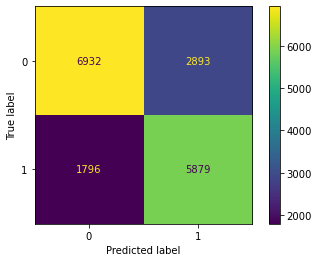

In [620]:
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()
plt.show()

In [621]:
print('\n Classfication Report \n', classification_report(y_pred,y_test))




 Classfication Report 
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      9825
           1       0.67      0.77      0.71      7675

    accuracy                           0.73     17500
   macro avg       0.73      0.74      0.73     17500
weighted avg       0.74      0.73      0.73     17500



In [622]:
param =  {
    'criterion': ['gini','entropy'],
    'max_depth' : range(5,15),
    'min_samples_leaf' : range(11,16),
    'max_features' : [ 'sqrt', 'log2' , None],
    'splitter' : ['best','random']
}

# Initializing Grid Search CV
grid_search = GridSearchCV(estimator=Class_tree,
                           param_grid=param, cv=5, n_jobs=-1)

#Applying Grid Search CV
grid_search.fit(X_train, y_train)


#Result
print('Grid Search Best Parameter',grid_search.best_params_)
print('Grid Search Best Score',grid_search.best_score_)

Grid Search Best Parameter {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 15, 'splitter': 'best'}
Grid Search Best Score 0.7320952380952381


In [623]:
# Initializing Decision Tree
Class_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, max_features = None,
                                   min_samples_leaf= 15, splitter='best')

# Applying Decision Tree model to data
Class_tree.fit(X_train,y_train)

# Predict the model
y_pred = Class_tree.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)

Accuracy Score 73.12571428571428


In [624]:
print('\n Classfication Report \n', classification_report(y_pred,y_test))


 Classfication Report 
               precision    recall  f1-score   support

           0       0.80      0.70      0.75      9927
           1       0.66      0.77      0.71      7573

    accuracy                           0.73     17500
   macro avg       0.73      0.74      0.73     17500
weighted avg       0.74      0.73      0.73     17500




 Confusion Matrix 
 [[6976 2951]
 [1752 5821]]


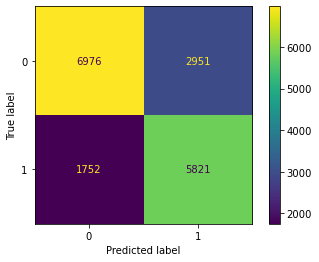

In [625]:
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()
plt.show()

## implemented from scratch 

In [626]:
import math
from collections import Counter

class Node:
    def __init__(self, attribute=None, branches=None, label=None):
        self.attribute = attribute
        self.branches = branches if branches else {}
        self.label = label

class DecisionTree_implemented:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return [self._classify(x, self.root) for x in X]

    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(X) < self.min_samples_split:
            return Node(label=self._most_common_label(y))

        best_attribute = self._choose_best_attribute(X, y)
        node = Node(attribute=best_attribute)

        for value in set(X[:, best_attribute]):
            X_v = X[X[:, best_attribute] == value]
            y_v = y[X[:, best_attribute] == value]
            node.branches[value] = self._build_tree(X_v, y_v, depth + 1)

        return node

    def _classify(self, x, node):
        if node.label is not None:
            return node.label
        value = x[node.attribute]
        if value not in node.branches:
            return self._most_common_label([child.label for child in node.branches.values()])
        return self._classify(x, node.branches[value])

    def _choose_best_attribute(self, X, y):
        best_attribute = None
        best_info_gain = -math.inf
        for attribute in range(X.shape[1]):
            info_gain = self._information_gain(X, y, attribute)
            if info_gain > best_info_gain:
                best_attribute = attribute
                best_info_gain = info_gain
        return best_attribute

    def _information_gain(self, X, y, attribute):
        parent_entropy = self._entropy(y)
        weighted_child_entropy = 0.0
        for value in set(X[:, attribute]):
            X_v = X[X[:, attribute] == value]
            y_v = y[X[:, attribute] == value]
            weighted_child_entropy += len(X_v) / len(X) * self._entropy(y_v)
        return parent_entropy - weighted_child_entropy

    def _entropy(self, y):
        total_count = len(y)
        count_dict = Counter(y)
        entropy = 0.0
        for count in count_dict.values():
            probability = count / total_count
            entropy -= probability * math.log2(probability)
        return entropy

    def _most_common_label(self, y):
        count_dict = Counter(y)
        return count_dict.most_common(1)[0][0]


In [627]:
dt = DecisionTree_implemented(max_depth=7)

In [628]:
dt.fit(X_train, y_train)

In [629]:
y_pred_implemented = dt.predict(X_test)


In [630]:
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

In [631]:
acc=accuracy(y_pred_implemented,y_test)

In [632]:
print('Accuracy of the implemented model', acc*100)

Accuracy of the implemented model 60.59428571428571


## Student table 

In [651]:
student = {'EarlyRegistration':[1,1,0,0,0,0,1,0,0,1,1,0,0,1], 'Finishedhomework2':[1,1,0,1,1,0,0,1,0,0,1,1,0,0],'Senior':[0,1,1,1,1,1,0,0,1,0,1,1,0,0],'LikesCoffee':[0,0,0,0,0,1,0,1,0,0,0,1,0,1],'LikedTheLasthomework':[1,1,0,1,0,1,1,1,1,0,0,1,1,0],'A':[1,1,0,0,1,1,0,1,1,0,1,0,0,1]}  

In [652]:
student

{'EarlyRegistration': [1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1],
 'Finishedhomework2': [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
 'Senior': [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0],
 'LikesCoffee': [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
 'LikedTheLasthomework': [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0],
 'A': [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]}

In [653]:
student = pd.DataFrame(student) 
student

,EarlyRegistration,Finishedhomework2,Senior,LikesCoffee,LikedTheLasthomework,A
0,1,1,0,0,1,1
1,1,1,1,0,1,1
2,0,0,1,0,0,0
3,0,1,1,0,1,0
4,0,1,1,0,0,1
5,0,0,1,1,1,1
6,1,0,0,0,1,0
7,0,1,0,1,1,1
8,0,0,1,0,1,1
9,1,0,0,0,0,0


In [654]:
student.to_csv('student.csv', index=False)

In [655]:
student = pd.read_csv('student.csv', encoding='utf-8')
student

,EarlyRegistration,Finishedhomework2,Senior,LikesCoffee,LikedTheLasthomework,A
0,1,1,0,0,1,1
1,1,1,1,0,1,1
2,0,0,1,0,0,0
3,0,1,1,0,1,0
4,0,1,1,0,0,1
5,0,0,1,1,1,1
6,1,0,0,0,1,0
7,0,1,0,1,1,1
8,0,0,1,0,1,1
9,1,0,0,0,0,0


In [656]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   EarlyRegistration     14 non-null     int64
 1   Finishedhomework2     14 non-null     int64
 2   Senior                14 non-null     int64
 3   LikesCoffee           14 non-null     int64
 4   LikedTheLasthomework  14 non-null     int64
 5   A                     14 non-null     int64
dtypes: int64(6)
memory usage: 800.0 bytes


In [657]:
x = student.drop('A', axis=1).values
y = student['A'].values

In [658]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x, y, test_size = 0.1, random_state = 0)
x_train_s

array([[0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 0, 1]], dtype=int64)

In [659]:
clf1 = DecisionTreeClassifier(max_depth=6,random_state=60)

In [660]:
clf1 = clf1.fit(x_train_s,y_train_s)
y_pred = clf1.predict(x_test_s)

In [661]:
print("Accuracy:",metrics.accuracy_score(y_test_s, y_pred)*100)

Accuracy: 50.0


In [662]:
## by the implemented decision tree

In [663]:
dt2 = DecisionTree_implemented(max_depth=4)

In [664]:
dt2.fit(x_train_s, y_train_s)

In [665]:
y_pred_implemented2 = dt2.predict(x_test_s)


In [666]:
acc2=accuracy(y_pred_implemented2,y_test_s)

In [667]:
print('Accuracy of the implemented model', acc2*100)

Accuracy of the implemented model 50.0
